In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Data Preprocessing

In [37]:
# Loading the dataset from CSV
df = pd.read_csv('Stock_Price_data_set.csv')

In [38]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [40]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


# Visualization

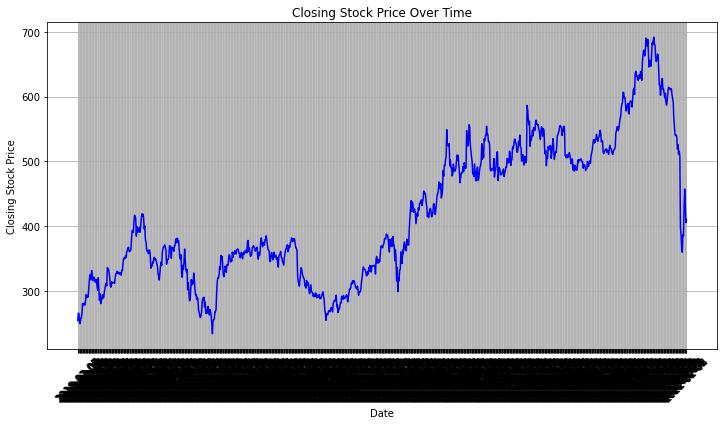

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.title('Closing Stock Price Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


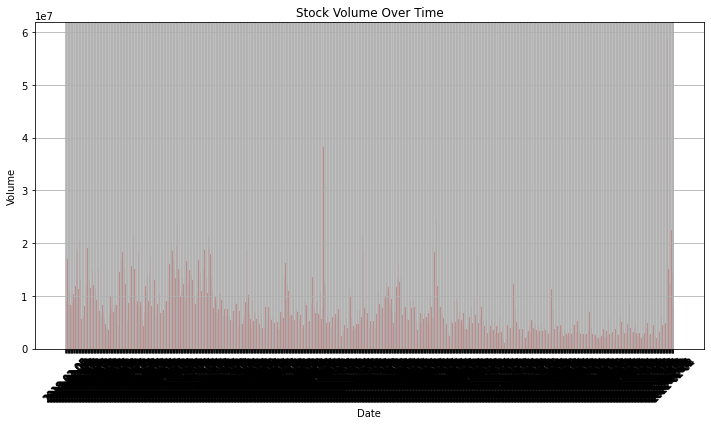

In [42]:
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume'], color='red')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Volume Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


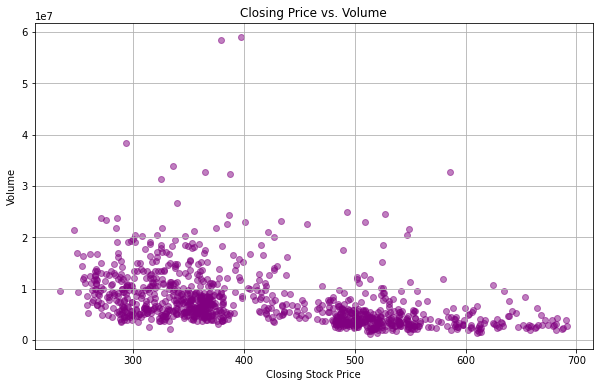

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Close'], df['Volume'], color='purple', alpha=0.5)
plt.xlabel('Closing Stock Price')
plt.ylabel('Volume')
plt.title('Closing Price vs. Volume')
plt.grid(True)
plt.show()


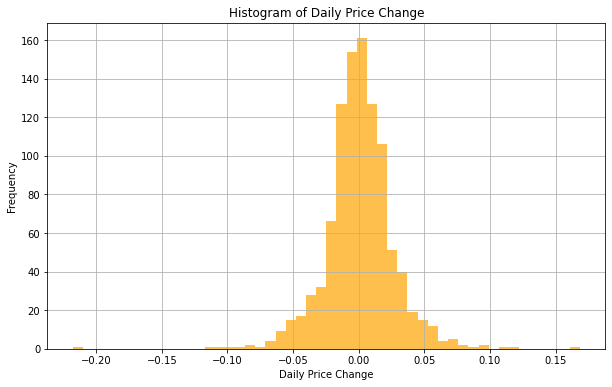

In [44]:
daily_returns = df['Close'].pct_change()
plt.figure(figsize=(10, 6))
plt.hist(daily_returns.dropna(), bins=50, color='orange', alpha=0.7)
plt.xlabel('Daily Price Change')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Price Change')
plt.grid(True)
plt.show()


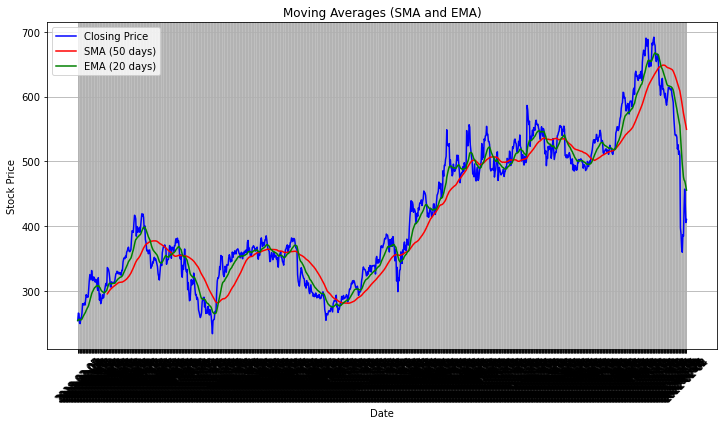

In [45]:
plt.figure(figsize=(12, 6))
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['SMA_50'], label='SMA (50 days)', color='red')
plt.plot(df['Date'], df['EMA_20'], label='EMA (20 days)', color='green')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Moving Averages (SMA and EMA)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


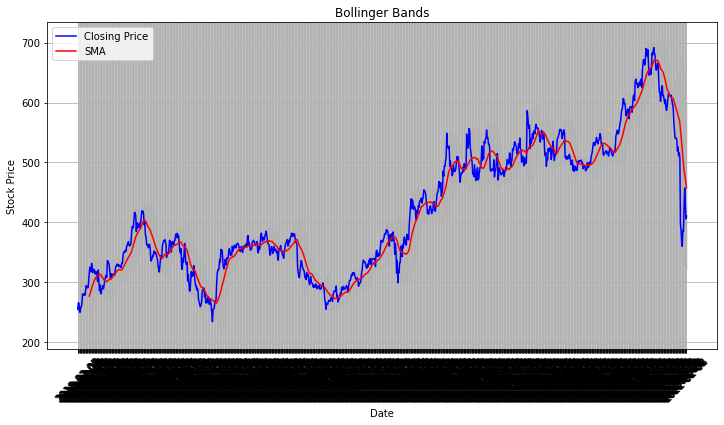

In [46]:
plt.figure(figsize=(12, 6))
window = 20  # Adjust the window size if needed
df['SMA'] = df['Close'].rolling(window=window).mean()
df['STD'] = df['Close'].rolling(window=window).std()

df['Upper'] = df['SMA'] + 2 * df['STD']
df['Lower'] = df['SMA'] - 2 * df['STD']

plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['SMA'], label='SMA', color='red')
plt.fill_between(df['Date'], df['Upper'], df['Lower'], color='gray', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Bollinger Bands')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [47]:
# Handle missing data and data cleaning (imputation for missing values)
df.fillna(method='ffill', inplace=True)  # Forward fill missing values
df.dropna(inplace=True)  # Drop any remaining rows with missing values



# Feature Engineering

In [48]:

# Extracting relevant features and target variable
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]  # Select features
y = df['Close']  # Target variable, predicting the 'Close' stock price

# Data Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training

In [50]:
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Using 100 decision trees
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Model Evaluation

In [51]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)



Mean Squared Error: 3.8782310623426395
Root Mean Squared Error: 1.9693224881523694
Mean Absolute Error: 0.6671437576562383
R^2 Score: 0.999666196046549
